# 台北大學在職專班 110 學年度 機器學習 Python 實作


# 課程大綱

## 1 - 課程前置作業
> 1.1 註冊 Colab & Kaggle 帳號<br>
> 1.2 取得 Kaggle Account API Token <br>
> 1.3 在 Colab 中透過 Kaggle API 下載資料集<br> 
> 1.4 下載字體到指定位置<br>
> 1.5 Python 繪圖套件以及設定

## 2 - 特徵擷取: 降維
> 2.1 線性降維：PCA<br>
> 2.2 非線性降維：t-SNE<br>
> 2.3 PCA 與 t-SNE 比較<br>
> 2.4 練習<br>

## 3 - 非監督式學習: 分群
> 3.1 以距離進行分群：K-means<br>
> 3.2 以密度進行分群：DBSCAN<br>
> 3.3 類別變數的分群：K - Modes<br>
> 3.4 練習<br>

## 4 - 監督式學習: 分類
> 4.1 SVM<br>
> 4.2 XGBoost<br>
> 4.3 Random Forest<br>
> 4.4 KNN<br>

## 5 - 監督式學習: 迴歸
> 5.1 SVR<br>
> 5.2 XGBoost<br>
> 5.3 隨機森林<br>
> 5.4 Linear Regression<br>

## 6 - 實際演練

## 7 - 參考資料 & 學習資源


## 1 - 課程前置作業

> 1.1 註冊 Colab & Kaggle 帳號<br>
> 1.2 取得 Kaggle Account API Token, 並存入 Colab<br>
> 1.3 在 Colab 中透過 Kaggle API 下載資料集<br>
> 1.4 下載字體到指定位置<br>
> 1.5 Python 繪圖套件以及設定










### 1.1 註冊 Colab & Kaggle 帳號
 - Colab (https://colab.research.google.com/notebooks/welcome.ipynb?hl=zh-tw)<br>
 - Kaggle (https://www.kaggle.com/)<br>

### 1.2 取得 Kaggle Account API Token, 並存入 Colab
 - 登入 Kaggle 以後點選右上角的頭像，進入 `My Account`
 - 往下捲到 API 選擇 `Create New API Token`, 會下載一份 `kaggle.json` 檔案

In [ ]:
# 取得 Kaggle Account API Token
!pip install kaggle
import json
import zipfile
import os

api_token = {"username":"yiwenyeh","key":"68da865b77343b7b1ce96ca2e1889815"} # 記得換成剛剛下載的 kaggle.json 內容 

# 將 API Token 上傳到 Colab
if not os.path.exists("/root/.kaggle"):
    os.makedirs("/root/.kaggle")
 
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json
 
if not os.path.exists("/kaggle"):
    os.makedirs("/kaggle")
os.chdir('/kaggle')
!kaggle datasets download -d chetankv/dogs-cats-images --force
 
!ls /kaggle

 98% 424M/435M [00:03<00:00, 187MB/s]
100% 435M/435M [00:04<00:00, 113MB/s]
dogs-cats-images.zip


### 1.3 在 Colab 中透過 Kaggle API 下載資料集
**如果遇到 <font color=#FF0000>`403 - Forbidden`</font>, 則表示要先去 Kaggle <font color=#FF0000>`agree Competition Rules`</font>**

In [ ]:
# 下載 jigsaw-toxic-severity-rating 資料集
!kaggle competitions download -c jigsaw-toxic-severity-rating

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


### 1.4 Python 繪圖套件以及中文字呈現設定
Python 作圖標題會使用到中文字，所以需要先下載中文字體到指定路徑。<br>
我們可以先來看看如果沒有設定會呈現的樣子。

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25105 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26159 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36600 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 25105 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 26159 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 36600 missing from current font.
  font.set_text

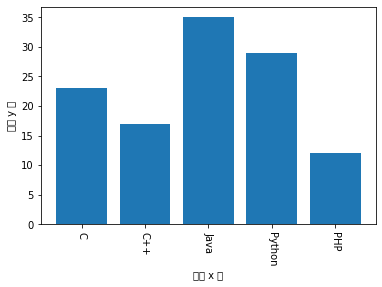

In [ ]:
# 如果沒有設定會呈現的樣子
import matplotlib.pyplot as plt

langs = ['C', 'C++', 'Java', 'Python', 'PHP']
students = [23,17,35,29,12]

plt.bar(langs,students)
plt.xlabel('我是 x 軸')
plt.ylabel('我是 y 軸')
plt.xticks(rotation=270)
plt.show()

In [ ]:
# 將字體下載至指定路徑 /usr/share/fonts/truetype
!wget -O /usr/share/fonts/truetype/liberation/simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"

# Import library
import matplotlib
import matplotlib.pyplot as plt

zhfont = matplotlib.font_manager.FontProperties(fname='/usr/share/fonts/truetype/liberation/simhei.ttf')
plt.rcParams['axes.unicode_minus'] = False  # 用來顯示負號

--2022-01-16 09:24:13--  https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf
Resolving www.wfonts.com (www.wfonts.com)... 104.225.219.210
Connecting to www.wfonts.com (www.wfonts.com)|104.225.219.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050870 (9.6M) [application/octetstream]
Saving to: ‘/usr/share/fonts/truetype/liberation/simhei.ttf’

/usr/share/fonts/tr 100%[===================>]   9.58M  24.7MB/s    in 0.4s    

2022-01-16 09:24:14 (24.7 MB/s) - ‘/usr/share/fonts/truetype/liberation/simhei.ttf’ saved [10050870/10050870]



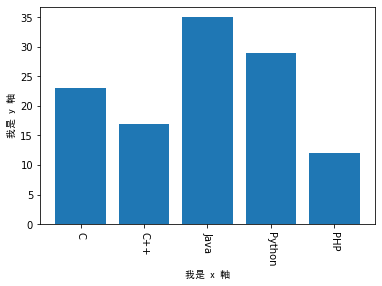

In [ ]:
# 設定後的結果
import matplotlib.pyplot as plt

langs = ['C', 'C++', 'Java', 'Python', 'PHP']
students = [23,17,35,29,12]

plt.bar(langs,students)
plt.xlabel('我是 x 軸', fontproperties = zhfont)
plt.ylabel('我是 y 軸', fontproperties = zhfont)
plt.xticks(rotation=270)
plt.show()

## 2 - 特徵擷取: 降維
特徵擷取這部分會介紹兩個方法論的實作，分別是 `PCA`(Principal Component Analysis) 以及 `t-SNE`



### 2.1 線性降維：PCA

#### 匯入資料

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.decomposition import PCA

sns.set()

In [ ]:
# 匯入資料集
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine_data = pd.read_csv(url, sep=";")
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
X = wine_data.drop(["quality"],axis = 1)
y = wine_data["quality"]
print(f"紅酒資料有 {X.shape[1]} 維度")

紅酒資料有 11 維度


#### 將資料正規化

In [ ]:
# 將資料正規化
scaler = preprocessing.StandardScaler().fit(X)
scaled_X = scaler.transform(X)

#### 開始降維
參數介紹:<br>
1. n_components: 降維數目，若沒有設定，`n_components = min(樣本數，特徵數)`<br>
2. svd_solver: 指定奇異值分解 SVD 的方法, 預設是 `auto`<br>

In [ ]:
# 開始使用 sklearn PCA 
# 若沒有設定，n_components = min(樣本數，特徵數)
# 也可以用 0 < n_components < 1， 請 PCA 幫我們決定主成份數量
pca = PCA() 

# 訓練 PCA 模型
pca.fit(scaled_X) 
X_pca = pca.transform(scaled_X) 

# n_components = min(樣本數，特徵數), n_components = 11
X_pca[0].shape

(11,)

#### PCA function 介紹

1.   explained_variance_: 解釋變異量
2.   explained_variance_ratio_: 解釋變異量的佔比
3.   n_components_: 降維的 PCA 數量



In [ ]:
# 解釋變異量
pca.explained_variance_

array([3.10107182, 1.92711489, 1.55151379, 1.21399175, 0.95989238,
       0.66002104, 0.58415655, 0.42322138, 0.34485779, 0.18144664,
       0.05959558])

In [ ]:
# 解釋變異量的佔比
pca.explained_variance_ratio_

array([0.28173931, 0.1750827 , 0.1409585 , 0.11029387, 0.08720837,
       0.05996439, 0.05307193, 0.03845061, 0.0313311 , 0.01648483,
       0.00541439])

In [ ]:
# 降維的 PCA 數量
pca.n_components_

11

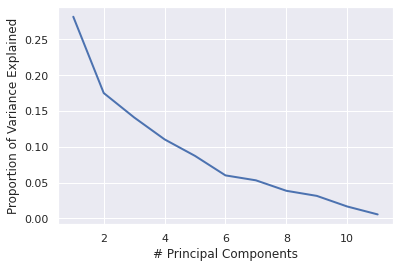

In [ ]:
%matplotlib inline
# 繪圖各主成份的解釋變異量佔比
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, linewidth=2)
plt.xlabel('# Principal Components')
plt.ylabel('Proportion of Variance Explained')
plt.show()

#### 選擇主成份數量
選擇主成分數量的準則目前沒有統一標準，其中一個準則為：<br>
保留的主成分個數(`n_components`) 要能夠解釋總體方差的 70% 以上<br>


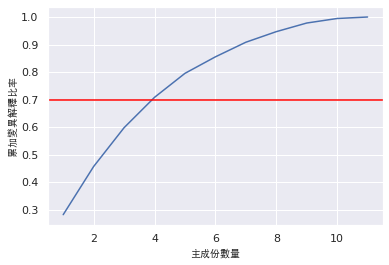

In [ ]:
# 計算主成分累積的累加變異解釋率
cum_explained_var_ratio = np.cumsum(pca.explained_variance_ratio_)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, cum_explained_var_ratio)
plt.xlabel('主成份數量', fontproperties = zhfont)
plt.ylabel('累加變異解釋比率', fontproperties = zhfont)
plt.axhline(y = 0.7, color = 'red')
plt.show()

#### 主成份取 4 個

In [ ]:
pca = PCA(n_components=4).fit(scaled_X)
pca_4 = pca.transform(scaled_X)

# 降維至 4 主成份
pca_4

array([[-1.61952988,  0.45095009, -1.77445415,  0.04374031],
       [-0.79916993,  1.85655306, -0.91169017,  0.54806597],
       [-0.74847909,  0.88203886, -1.17139423,  0.41102067],
       ...,
       [-1.45612897,  0.31174559,  1.12423941,  0.49187676],
       [-2.27051793,  0.97979111,  0.62796456,  0.63977007],
       [-0.42697475, -0.53669021,  1.6289552 , -0.39171595]])

### 2.3 非線性降維：t-SNE
相較於 PCA(主成分分析) 的降維方式，t-SNE 可以在變數關聯為 <font color=#FF0000>`非線性`</font> 的關係時能有更好的處理。

#### 匯入資料

In [ ]:
from sklearn.manifold import TSNE
from keras.datasets import mnist
from sklearn.datasets import load_iris, load_digits
from numpy import reshape
import seaborn as sns
import pandas as pd 

In [ ]:
# 匯入 MNIST 手寫辨識資料
digits = load_digits()
X = digits.data
y = digits.target

#### 開始降維
參數介紹:<br>
1. n_components: 降維數目，若沒有設定， default 是降到 2 維<br>
2. perplexity: 困惑度, default 是 30。一般來說，大的資料集需要更大的困惑度。困惑度可以解釋成有效鄰近樣本點數量，困惑度越大，近鄰越多，對小區域的敏感度就越小。 <br>
3. verbose: 要不要看訓練過程，default 是 0，也就是不要看訓練過程。訓練過程為：鄰近點數量、訓練時間等<br>

In [ ]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
tsne_result = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.001s...
[t-SNE] Computed neighbors for 1797 samples in 0.154s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 11.585657
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.409405
[t-SNE] KL divergence after 1000 iterations: 0.737005
CPU times: user 23.8 s, sys: 201 ms, total: 24 s
Wall time: 12.4 s


### 2.4 PCA 與 t-SNE 比較
t-SNE 是非線性的降維演算法，能實現高維到低維的視覺化對映，但因為涉及大量的條件概率、梯度下降等計算，時間和空間複雜度是平方級的，比較耗資源。<br>
此外，t-SNE 幾乎可用於所有高維資料集，廣泛應用於影象處理，自然語言處理，基因組資料和語音處理。<br>
在此，我們會將同一筆資料(MNIST 手寫辨識資料) 分別進行 PCA 與 t-SNE 兩種降維方法，藉此來看看 t-SNE 的特性


#### 匯入 MNIST 手寫辨識資料

In [ ]:
digits = load_digits()
X = digits.data
y = digits.target

#### t-SNE 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.001s...
[t-SNE] Computed neighbors for 1797 samples in 0.164s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 11.585657
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.409405
[t-SNE] KL divergence after 1000 iterations: 0.737005


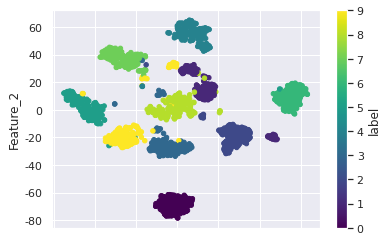

In [ ]:
# t-SNE
tsne = TSNE(n_components=2, verbose=1, random_state=123)
tsne_result = tsne.fit_transform(X)

# Data Visualization - t-SNE
df = pd.DataFrame(dict(Feature_1=tsne_result[:,0], Feature_2=tsne_result[:,1], label=y))

df.plot(x="Feature_1", y="Feature_2", kind='scatter', c='label', colormap='viridis')
plt.show()

#### PCA

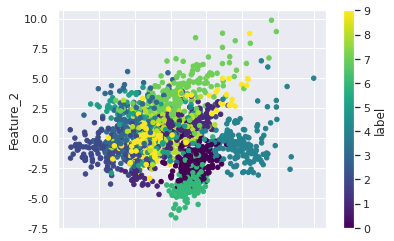

In [ ]:
# 將資料正規化
scaler = preprocessing.StandardScaler().fit(X)
scaled_X = scaler.transform(X)

# 訓練 PCA 模型
pca = PCA(n_components=2) 
pca.fit(scaled_X) 
X_pca = pca.transform(scaled_X) 

# Data Visualization - PCA
df = pd.DataFrame(dict(Feature_1=X_pca[:,0], Feature_2=X_pca[:,1], label=y))

df.plot(x="Feature_1", y="Feature_2", kind='scatter', c='label', colormap='viridis')
plt.show()

### 2.5 練習
https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python

In [ ]:
# 下載數據集
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
print('Traning data shape:', x_train.shape)
print('Testing data shape:', x_test.shape)
print('The shape of the labels:', y_train.shape, y_test.shape)

Traning data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)
The shape of the labels: (50000, 1) (10000, 1)


In [ ]:
label_dict = {
 0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer',
 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck',
}

Text(0.5, 1.0, '(Label: frog)')
Text(0.5, 1.0, '(Label: cat)')


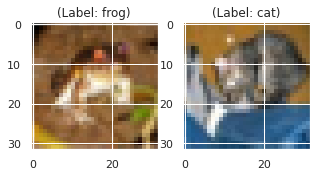

In [ ]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(x_train[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_train[0][0]]) + ")"))

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(x_test[0],(32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_test[0][0]]) + ")"))

#### 資料前處理

In [ ]:
# 將資料正規化
x_train = x_train/255.0

# 將資料攤平
x_train_flat = x_train.reshape(-1,3072)
feat_cols = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]
df_cifar = pd.DataFrame(x_train_flat,columns=feat_cols)
df_cifar['label'] = y_train
df_cifar.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel3033,pixel3034,pixel3035,pixel3036,pixel3037,pixel3038,pixel3039,pixel3040,pixel3041,pixel3042,pixel3043,pixel3044,pixel3045,pixel3046,pixel3047,pixel3048,pixel3049,pixel3050,pixel3051,pixel3052,pixel3053,pixel3054,pixel3055,pixel3056,pixel3057,pixel3058,pixel3059,pixel3060,pixel3061,pixel3062,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,0.211765,0.164706,0.384314,0.286275,0.203922,0.466667,0.356863,0.247059,0.545098,0.419608,0.294118,0.568627,0.431373,0.313725,0.584314,0.458824,0.349020,0.584314,0.470588,0.364706,0.513725,0.403922,0.301961,0.490196,0.388235,0.298039,0.556863,0.450980,0.356863,0.564706,...,0.580392,0.403922,0.301961,0.631373,0.411765,0.270588,0.564706,0.372549,0.215686,0.439216,0.352941,0.231373,0.466667,0.356863,0.227451,0.509804,0.376471,0.254902,0.470588,0.341176,0.231373,0.360784,0.262745,0.180392,0.403922,0.305882,0.223529,0.666667,0.549020,0.407843,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353,6
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,0.396078,0.388235,0.490196,0.513725,0.545098,0.607843,0.650980,0.705882,0.674510,0.745098,0.823529,0.705882,0.780392,0.839216,0.556863,0.611765,0.611765,0.435294,0.470588,0.431373,0.415686,0.419608,0.384314,0.427451,0.407843,0.400000,0.482353,0.474510,0.458824,0.498039,...,0.019608,0.023529,0.043137,0.023529,0.023529,0.043137,0.039216,0.035294,0.047059,0.098039,0.086275,0.086275,0.200000,0.176471,0.164706,0.266667,0.250980,0.262745,0.352941,0.352941,0.396078,0.454902,0.443137,0.478431,0.525490,0.498039,0.521569,0.549020,0.509804,0.533333,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706,9
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.298039,0.352941,0.352941,0.282353,0.337255,0.337255,0.250980,0.305882,0.305882,0.250980,0.305882,0.305882,0.270588,0.325490,0.325490,0.258824,0.313725,0.313725,0.215686,0.270588,0.270588,0.203922,0.258824,0.258824,0.227451,0.282353,0.282353,0.266667,0.313725,0.309804,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313725,0.337255,0.329412,9
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,0.145098,0.090196,0.172549,0.152941,0.098039,0.156863,0.145098,0.086275,0.156863,0.149020,0.090196,0.094118,0.090196,0.035294,0.125490,0.098039,0.058824,0.168627,0.105882,0.074510,0.117647,0.078431,0.039216,0.125490,0.117647,0.066667,0.160784,0.145098,0.090196,0.203922,...,0.478431,0.388235,0.262745,0.419608,0.333333,0.211765,0.439216,0.376471,0.258824,0.360784,0.317647,0.207843,0.313725,0.243137,0.152941,0.376471,0.305882,0.231373,0.301961,0.262745,0.164706,0.333333,0.298039,0.172549,0.329412,0.294118,0.188235,0.262745,0.223529,0.149020,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392,4
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,0.756863,0.827451,0.709804,0.768627,0.854902,0.694118,0.764706,0.862745,0.709804,0.764706,0.874510,0.721569,0.752941,0.874510,0.741176,0.745098,0.874510,0.741176,0.741176,0.870588,0.737255,0.756863,0.878431,0.717647,0.760784,0.874510,0.713725,0.760784,0.874510,0.721569,...,0.364706,0.384314,0.400000,0.352941,0.372549,0.

#### [練習] PCA 線性降維

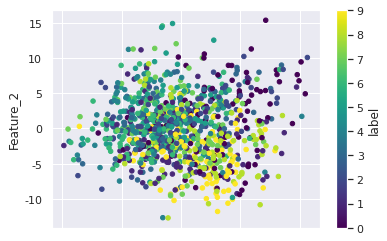

CPU times: user 893 ms, sys: 386 ms, total: 1.28 s
Wall time: 840 ms


In [ ]:
%%time
pca_cifar = PCA(n_components=2)
n = 1000 # 取 1000 筆
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:n,:-1]) 

# Data Visualization - PCA
df = pd.DataFrame(dict(Feature_1=principalComponents_cifar[:,0], Feature_2=principalComponents_cifar[:,1], label=df_cifar.iloc[:n,-1]))

df.plot(x="Feature_1", y="Feature_2", kind='scatter', c='label', colormap='viridis')
plt.show()

#### [練習] t-SNE 非線性降維

In [ ]:
from sklearn.manifold import TSNE

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.003s...
[t-SNE] Computed neighbors for 1000 samples in 0.160s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 3.889617
[t-SNE] KL divergence after 250 iterations with early exaggeration: 98.274673
[t-SNE] KL divergence after 1000 iterations: 1.656057


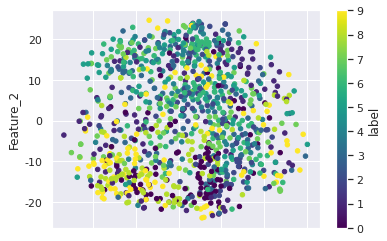

CPU times: user 17.5 s, sys: 206 ms, total: 17.7 s
Wall time: 9.28 s


In [ ]:
%%time
# t-SNE
tsne = TSNE(n_components=2, verbose=1, random_state=123)
n = 1000 # 取 1000 筆
tsne_result = tsne.fit_transform(df_cifar.iloc[:n,:-1])

# Data Visualization - t-SNE
df = pd.DataFrame(dict(Feature_1=tsne_result[:,0], Feature_2=tsne_result[:,1], label=df_cifar.iloc[:n,-1]))

df.plot(x="Feature_1", y="Feature_2", kind='scatter', c='label', colormap='viridis')
plt.show()

## 3 - 非監督式學習: 分群

### 3.1 以距離進行分群：K - Means 

#### 產生假資料

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
# 隨機產生 10 組 2 features 的資料 500 筆 (dy 即原始目標值 label 0~9)
dx, dy = make_blobs(n_samples=500, n_features=2, centers=10, random_state=42)

#### 將產生的資料視覺化呈現 - 原始資料散佈圖
若以肉眼來看，可以將資料分成 7 群

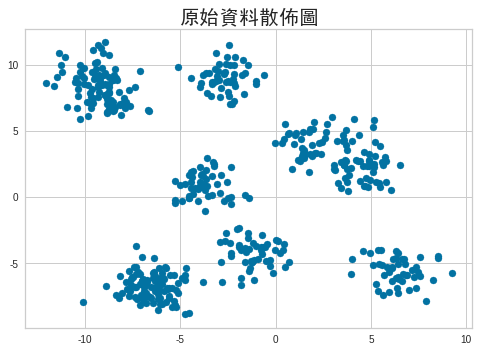

In [ ]:
# 若以肉眼來看，可以將資料分成 7 群
plt.title(f'原始資料散佈圖', fontproperties = zhfont, fontsize =20)
plt.scatter(dx.T[0], dx.T[1], cmap=plt.cm.Set1)
plt.show()

#### 開始分群 - 分 7 群
參數介紹:<br>
1. n_clusters: 分群數目，default 將資料分成 8 群
<br>


In [ ]:
# 分 7 群
n_clusters = 7

# 開始分群
kmeans_ = KMeans(n_clusters, random_state=123).fit(dx)

# 每個資料點對應的群數
new_dy = kmeans_.predict(dx)
new_dy

array([0, 6, 4, 3, 1, 0, 4, 2, 1, 2, 0, 3, 6, 3, 6, 4, 3, 5, 2, 1, 3, 3,
       1, 3, 4, 2, 4, 6, 5, 4, 1, 2, 5, 5, 1, 1, 4, 1, 2, 5, 4, 1, 4, 5,
       2, 3, 4, 5, 1, 5, 4, 1, 3, 4, 0, 3, 5, 6, 4, 4, 6, 6, 0, 2, 1, 4,
       4, 5, 3, 1, 0, 4, 3, 0, 0, 0, 3, 3, 6, 2, 3, 4, 2, 3, 0, 4, 1, 3,
       4, 0, 0, 2, 4, 6, 3, 3, 3, 1, 1, 1, 6, 5, 1, 3, 1, 1, 4, 3, 5, 3,
       4, 5, 1, 1, 3, 6, 3, 0, 6, 0, 3, 4, 4, 2, 2, 6, 1, 4, 1, 2, 1, 2,
       2, 2, 3, 3, 3, 1, 2, 0, 4, 4, 6, 4, 4, 1, 6, 1, 6, 3, 0, 6, 6, 1,
       3, 1, 4, 4, 1, 5, 3, 3, 2, 1, 6, 2, 3, 3, 5, 3, 2, 1, 1, 1, 2, 4,
       1, 4, 4, 4, 1, 2, 3, 6, 5, 3, 3, 2, 3, 5, 1, 4, 0, 3, 3, 3, 5, 0,
       1, 4, 2, 5, 4, 2, 0, 2, 4, 4, 6, 5, 3, 2, 1, 5, 5, 6, 4, 0, 4, 4,
       4, 1, 1, 0, 2, 6, 6, 3, 5, 3, 1, 3, 5, 5, 1, 1, 3, 6, 4, 1, 3, 5,
       2, 4, 1, 6, 3, 3, 5, 1, 4, 4, 3, 4, 4, 1, 1, 1, 3, 4, 0, 6, 6, 0,
       5, 2, 4, 4, 3, 0, 3, 4, 1, 1, 1, 3, 1, 6, 3, 3, 1, 2, 3, 3, 3, 4,
       0, 6, 3, 3, 4, 5, 4, 4, 3, 2, 1, 1, 0, 3, 5,

#### 將分群結果視覺化

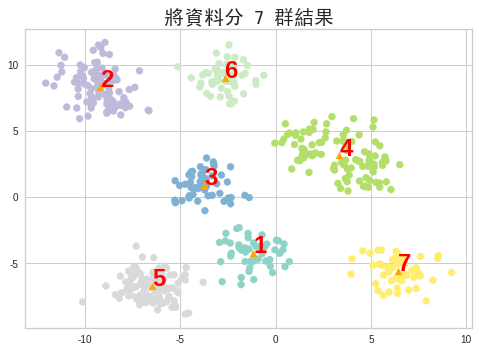

In [ ]:
plt.title(f'將資料分 {n_clusters} 群結果', fontproperties = zhfont, fontsize =20)
plt.scatter(dx.T[0], dx.T[1], c=new_dy, cmap=plt.cm.Set3)

# 新分組的資料中心點
centers = kmeans_.cluster_centers_

# 標上各分組中心點
plt.scatter(centers.T[0], centers.T[1], marker='^', color='orange')
for i in range(centers.shape[0]): # 標上各分組中心點
    plt.text(centers.T[0][i], centers.T[1][i], str(i + 1), fontdict={'color': 'red', 'weight': 'bold', 'size': 24})

#### 衡量分群結果
有兩種方式去選擇群數
1. Silhouetter coefficient<br>
  
> 計算公式：<br>  $ \frac{b_i-a_i}{max(b_i, a_i)} $ , $a_i$ 為同ㄧ cluster 中所有數據點的平均距離, $b_i$ 距離最近的 cluster 中所有數據點的平均距離 <br>  
> 最理想情況：<br>
  when $a_i = 0$, $b_i > 0 \Rightarrow$ $ \frac{b_i- 0}{max(b_i, 0)} = \frac{b_i}{b_i} = 1$<br>  
> 最糟情況：<br>
  when $a_i > 0 $, $b_i = 0 \Rightarrow$ $ \frac{0 - a_i}{max(0, a_i)} = \frac{-a_i}{a_i} = -1$

2. Elbow method<br>

> 其概念是基於 `SSE`（sum of the squared errors，誤差平方和）作為指標，去計算每一個群中的每一個點，到群中心的距離。<br>
> 計算公式：<br> 
$SSE = \sum_{i =1}^{k} \sum_{p \in C_i}|P_i - m_i|^2$，其中總共有 $K$ 個群， $C_i$ 代表其中一個群，$m_i$ 表示該群的中心點。



SSE (elbow method):1304.069399656595
Silhouetter Score: 0.684335357897129


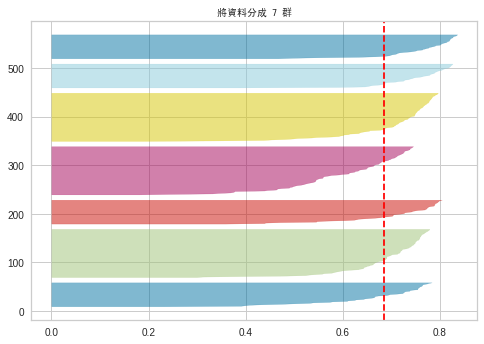

In [ ]:
# SSE 
print(f"SSE (elbow method):{kmeans_.inertia_}")

# Silhouetter coefficient
score_ = silhouette_score(dx, kmeans_.labels_, metric='euclidean')
print(f'Silhouetter Score: {score_}')

# 集群間的寬度、高度要越相近，表示分群分得越好
plt.title("將資料分成 7 群", fontproperties = zhfont)
visualizer = SilhouetteVisualizer(kmeans_, colors='yellowbrick')
visualizer.fit(dx)
plt.show()

#### 選擇群數

7


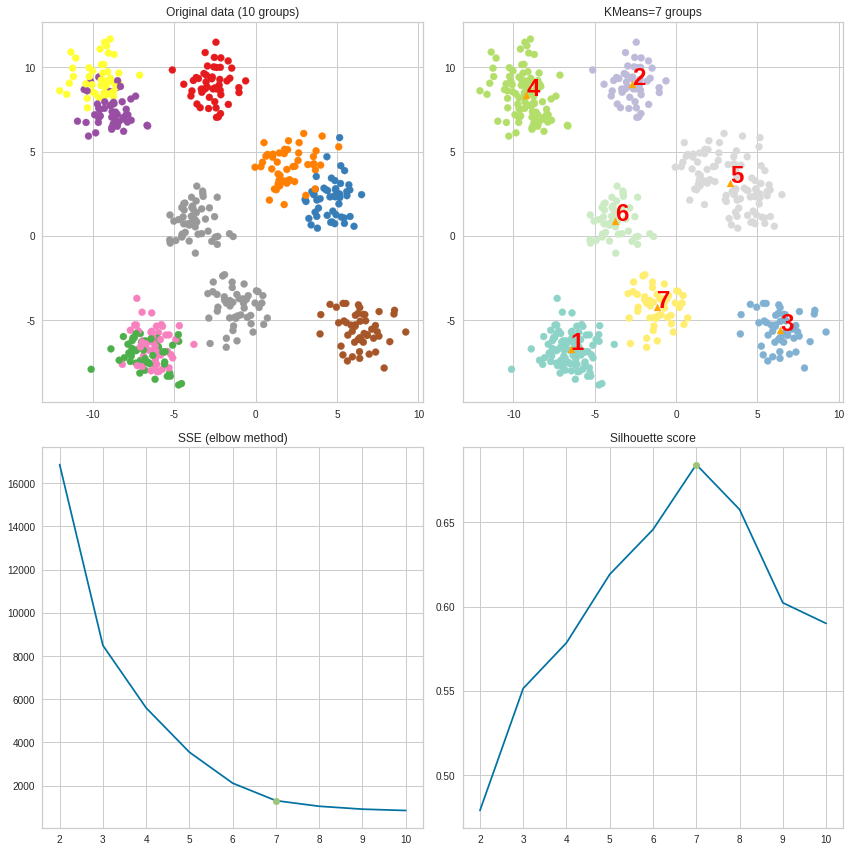

In [ ]:
clusters = 10
# K 值的範圍 (2~10)
k_range = range(2, clusters + 1)
sse = []
scores = []

# 記錄每種 K 值建出的 KMeans 模型的成效
for i in k_range:
    kmeans = KMeans(n_clusters=i).fit(dx)
    sse.append(kmeans.inertia_) # 誤差平方和 (SSE)
    scores.append(silhouette_score(dx, kmeans.predict(dx))) # 側影係數

# 找出最大的側影係數來決定 K 值
selected_K = scores.index(max(scores)) + 2
print(selected_K)

# 重新建立 KMeans 模型並預測目標值
kmeans = KMeans(n_clusters=selected_K).fit(dx)
new_dy = kmeans.predict(dx)

# 新分組的資料中心點
centers = kmeans.cluster_centers_
plt.rcParams['font.size'] = 12
plt.figure(figsize=(12, 12))

# 原始資料分組
plt.subplot(221)
plt.title(f'Original data ({clusters} groups)')
plt.scatter(dx.T[0], dx.T[1], c=dy, cmap=plt.cm.Set1)

# 新資料分組
plt.subplot(222)
plt.title(f'KMeans={selected_K} groups')
plt.scatter(dx.T[0], dx.T[1], c=new_dy, cmap=plt.cm.Set3)
plt.scatter(centers.T[0], centers.T[1], marker='^', color='orange')
for i in range(centers.shape[0]): # 標上各分組中心點
    plt.text(centers.T[0][i], centers.T[1][i], str(i + 1),
             fontdict={'color': 'red', 'weight': 'bold', 'size': 24})

# 繪製誤差平方和圖 (手肘法)
plt.subplot(223)
plt.title('SSE (elbow method)')
plt.plot(k_range, sse)
plt.plot(selected_K, sse[selected_K - 2], 'go') # 最佳解

# 繪製係數圖
plt.subplot(224)
plt.title('Silhouette score')
plt.plot(k_range, scores)
plt.plot(selected_K, scores[selected_K - 2], 'go') # 最佳解
plt.tight_layout()
plt.show()


### 3.2 以密度進行分群：DBSCAN

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

#### 產生假資料

In [ ]:
X, y = make_moons(n_samples=500, noise=0.1)
df = pd.DataFrame(X, y)
df = df.rename(columns={0: "X1", 1:"X2"})
df.head()

,X1,X2
0,-0.275128,0.966466
1,1.208612,-0.467189
1,1.694375,-0.284788
0,0.467023,0.836087
1,1.916242,-0.212511


#### 將產生的資料視覺化呈現 - 原始資料散佈圖

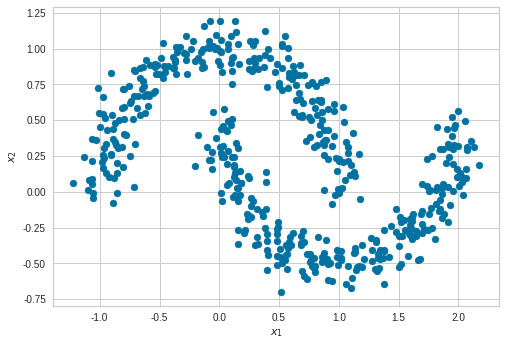

In [ ]:
plt.scatter(X[:, 0], X[:, 1], label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [ ]:
clustering = DBSCAN(eps=0.163, min_samples=8).fit(X)

# 分群結果, label -1 代表為 outlier
clustering.labels_

array([ 0,  0,  0,  0,  0,  1,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0, -1,  0,  0,  0,  1,  0,  1,  1,  0,  1,  1,  1,
        1,  1,  1,  0,  0,  0,  0,  1,  1,  1,  0,  0,  1,  1,  1,  1,  0,
        0,  1,  1,  0,  1,  0,  1,  0,  0,  1,  0,  1,  1,  1,  0,  0,  0,
        0,  0,  0,  1,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  0,
        1,  1,  1,  0,  0,  0,  1,  0,  1,  1,  1,  0,  1,  0,  0,  0,  1,
        0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  0,  1,  0,  1,
        0,  1,  0,  0,  1,  0,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  0,
        0,  1,  1,  0,  0,  1,  0, -1,  1,  1,  0,  1,  0,  1,  1,  1,  0,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  0,  0,  0,  0, -1,  0,  0,  0,
       -1,  0,  1,  1,  0,  1,  1,  1,  0,  0,  1,  0,  0,  1,  0,  0,  1,
        0,  1,  0,  1,  1,  1,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  1,
        0,  0,  0,  1,  0,  0,  1,  0,  1,  1,  1,  1,  0,  0,  0,  1,  0,
        0,  0,  1,  0,  1

#### 將分群結果視覺化

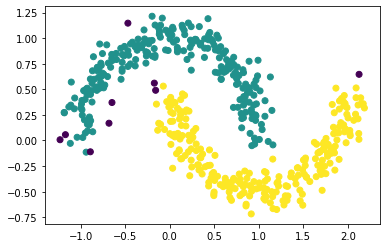

In [ ]:
# 用散佈圖簡單看最終分群的結果
plt.scatter(X[:,0],X[:,1], c=clustering.labels_)
plt.show()

### 3.3 類別變數的分群：K - Modes

In [ ]:
!pip install kmodes
import pandas as pd
from kmodes.kmodes import KModes
from sklearn import preprocessing

#### 匯入資料 

In [ ]:
# 只留下 `類別變數`
cols = ['age','job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome']
bank = pd.read_csv("/content/bankmarketing.csv")[cols]

# 將 `年齡` 分組
bank['age_bin'] = pd.cut(bank['age'], 
                         [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                         labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])
bank  = bank.drop('age',axis = 1)
bank.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,50-60
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,50-60
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,30-40
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,30-40
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,50-60


#### Data Encoding

In [ ]:
# data encoding
le = preprocessing.LabelEncoder()
bank = bank.apply(le.fit_transform)
bank.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,3,1,0,0,0,0,0,1,1,0,4
1,7,1,3,1,0,0,0,1,1,0,4
2,7,1,3,0,2,0,0,1,1,0,2
3,0,1,1,0,0,0,0,1,1,0,2
4,7,1,3,0,0,2,0,1,1,0,4


#### 開始分群

In [ ]:
# 開始分群
KModes_ = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
KModes_result = KModes_.fit_predict(bank)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5322, cost: 192203.0
Run 1, iteration: 2/100, moves: 1160, cost: 192203.0


In [ ]:
# Predicted Clusters
KModes_result

array([1, 1, 0, ..., 0, 1, 0], dtype=uint16)

#### 衡量分群結果

In [ ]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(bank)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 216952.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5322, cost: 192203.0
Run 1, iteration: 2/100, moves: 1160, cost: 192203.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4993, cost: 185138.0
Run 1, iteration: 2/100, moves: 1368, cost: 185138.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6186, cost: 179774.0
Run 1, iteration: 2/100, moves: 1395, cost: 179774.0


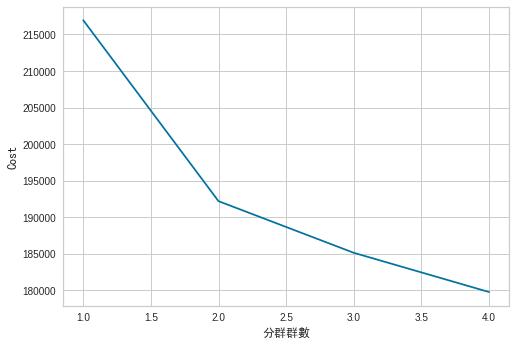

In [ ]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y, cost)
plt.xlabel('分群群數', fontproperties = zhfont)
plt.ylabel('Cost', fontproperties = zhfont)
plt.show()

### 3.4 練習
https://www.kaggle.com/c/instacart-market-basket-analysis/data

In [ ]:
!kaggle competitions download -c instacart-market-basket-analysis

aisles.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
orders.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
departments.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
order_products__train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
order_products__prior.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
products.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


#### [練習] K-means 分群

In [ ]:
# !unzip order_products__train.csv.zip 
!unzip departments.csv.zip 
!ls

Archive:  departments.csv.zip
  inflating: departments.csv         
  inflating: __MACOSX/._departments.csv  
aisles.csv.zip	      order_products__prior.csv      orders.csv.zip
departments.csv       order_products__prior.csv.zip  products.csv
departments.csv.zip   order_products__train.csv      products.csv.zip
dogs-cats-images.zip  order_products__train.csv.zip  sample_submission.csv.zip
__MACOSX	      orders.csv


In [ ]:
pd.read_csv("./products.csv")

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


#### [練習] DBSCAN 分群

## 4 - 監督式學習: 分類

### 4.1 SVM

#### 模型訓練

In [ ]:
# 匯入 python 套件
import pickle 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import metrics

In [ ]:
# 匯入乳癌資料 
bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target
 
# 將資料分成 train(70%)/test(30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
# 將資料標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
# 設定 SVM 參數, 在此使用 預設參數
svc = SVC()
 
# 模型訓練
svc.fit(X_train_std, y_train)

# 模型預測
y_predict = svc.predict(X_test_std)
 
# 評估模型表現
print(f"Accuracy score {metrics.accuracy_score(y_test, y_predict)}")

Accuracy score 0.9766081871345029


#### 模型調參
參數介紹：
GridSearchCV(模型, 參數組合, refit=True, verbose=0, cv=5, scoring=驗證指標)

In [ ]:
%%time
# 用 GridSearchCV tune 出模型最佳參數
param_grid = {
    'C': [0.1, 1, 10, 100], 
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ('rbf', 'poly', 'sigmoid')
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=0, cv=5, scoring="accuracy")
grid.fit(X_train_std, y_train)

# 最佳參數
print(grid.best_estimator_)

# 用最佳模型進行模型預測
print(grid.predict(X_test_std)) 

SVC(C=100, gamma=0.001, kernel='sigmoid')
[0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1
 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1
 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1
 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0]
CPU times: user 1.35 s, sys: 0 ns, total: 1.35 s
Wall time: 1.35 s


In [ ]:
# 直接用 tuned 好的 SVM 模型
grid_prediction = grid.predict(X_test_std)
grid_prediction

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0])

In [ ]:
# 設定 SVM 最佳參數
tuned_svc = SVC(C=100, gamma=0.001, kernel='sigmoid')

# 模型訓練
tuned_svc.fit(X_train_std, y_train)

SVC(C=100, gamma=0.001, kernel='sigmoid')

In [ ]:
# 模型預測
y_predict = tuned_svc.predict(X_test_std)
 
# 評估模型表現
print(f"Accuracy score {metrics.accuracy_score(y_test, y_predict)}")

Accuracy score 0.9707602339181286


#### 模型儲存

In [ ]:
# 儲存模型
file_name = './ntpu_ml_svm.pkl'
pickle.dump(svc, open(file_name, 'wb'))

# 匯入模型
file_name = './ntpu_ml_svm.pkl'
svc_2 = pickle.load(open(file_name, 'rb'))

In [ ]:
# 模型預測
y_predict_2 = svc_2.predict(X_test_std)
 
# 評估模型表現
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.91%


### 4.2 XGBoost

#### 模型訓練

In [ ]:
# 匯入 python 套件
import pickle
import xgboost as xgb

from sklearn.metrics import accuracy_score

In [ ]:
# 匯入乳癌資料 
bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target
 
# 將資料分成 train(70%)/test(30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
# 設定 XGBoost 模型參數, 在此使用 預設參數
classifier = xgb.XGBClassifier()

# 模型訓練
classifier.fit(X_train, y_train)

XGBClassifier()

In [ ]:
# 模型預測
y_pred = classifier.predict(X_test)
predictions = [round(value) for value in y_pred]
predictions[:3]

# 評估模型表現
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.32%


#### 模型調參 (參數較多，需要一點時間)
參數解釋：


1.  [XGboost入門經驗分享](https://medium.com/@pahome.chen/xgboost%E5%85%A5%E9%96%80%E7%B6%93%E9%A9%97%E5%88%86%E4%BA%AB-e06931b835f5) 
2.   [XGboost数据比赛实战之调参篇](https://zhuanlan.zhihu.com/p/35061092)


In [ ]:
# 用 GridSearchCV tune 出模型最佳參數
param_grid = {
    'n_estimators': [400, 700],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15, 20, 25],
    'subsample': [0.7, 0.8]
}
grid = GridSearchCV(xgb.XGBClassifier(), param_grid, refit=True, verbose=0, cv=5, scoring="accuracy") # default, cv = 5, which means 5-fold.
grid.fit(X_train, y_train)

# 最佳參數
print(grid.best_estimator_)

# 用最佳模型進行模型預測
print(grid.predict(X_test)) 

XGBClassifier(colsample_bytree=0.8, max_depth=15, n_estimators=400,
              subsample=0.8)
[0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1
 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1
 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1
 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0]


#### 特徵重要性

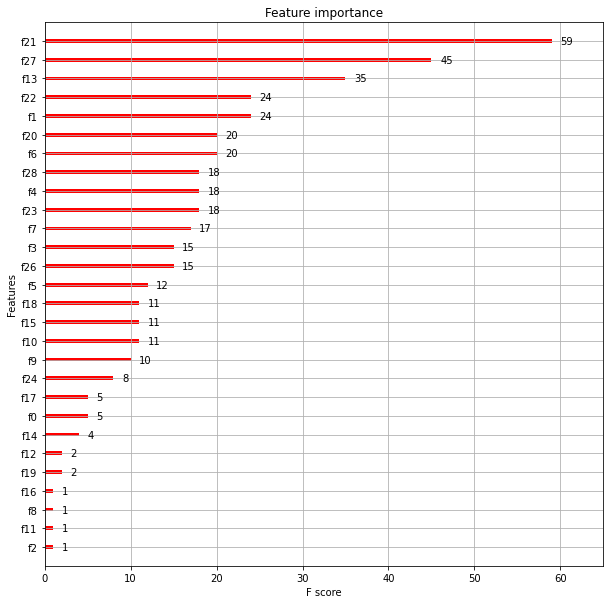

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
xgb.plot_importance(classifier, color='red') # default is weight, the number of times a feature appears in a tree
plt.show()

#### 模型儲存

In [ ]:
# 儲存模型
file_name = './ntpu_ml_xgboost.pkl'
pickle.dump(classifier, open(file_name, 'wb'))

# 匯入模型
file_name = './ntpu_ml_xgboost.pkl'
classifier_2 = pickle.load(open(file_name, 'rb'))

XGBClassifier(colsample_bytree=0.7, max_depth=15, n_estimators=400,
              reg_alpha=1.1, reg_lambda=1.1, subsample=0.8)
[0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1
 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1
 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1
 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0]


In [ ]:
# 用匯入的模型再次進行預測
y_pred_2 = classifier_2.predict(X_test)
predictions_2 = [round(value) for value in y_pred_2]
predictions_2[:3]

# 評估模型表現
accuracy = accuracy_score(y_test, predictions_2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

### 4.3 Random Forest


#### 模型訓練

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# 匯入資料
bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target
 
# 將資料分成 train/test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
# 設定 Random Forest 模型參數, 在此使用 預設參數
rfc = RandomForestClassifier(n_estimators=100, n_jobs = -1, random_state =50, min_samples_leaf = 10)
# 模型訓練
rfc.fit(X, y)

# 模型預測
predictions = rfc.predict(X_test)

# 評估模型表現
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.91%


#### 模型調參

In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, refit=True, verbose=0)
                                            
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 5],
                         'max_features': ['auto'], 'n_estimators': [200, 500]})

In [ ]:
# 最佳參數
print(grid.best_estimator_)

# 用最佳模型進行模型預測
print(grid.predict(X_test)) 

RandomForestClassifier(max_depth=5, n_estimators=200)
[0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1
 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1
 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1
 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0]


In [ ]:
# 設定 Random Forest 模型最佳參數
rfc = RandomForestClassifier(n_estimators=200, n_jobs = -1, random_state =50, min_samples_leaf = 10, max_depth=5)

# 模型訓練
rfc.fit(X, y)

# 模型預測
predictions = rfc.predict(X_test)

# 評估模型表現
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.91%


#### 特徵重要性

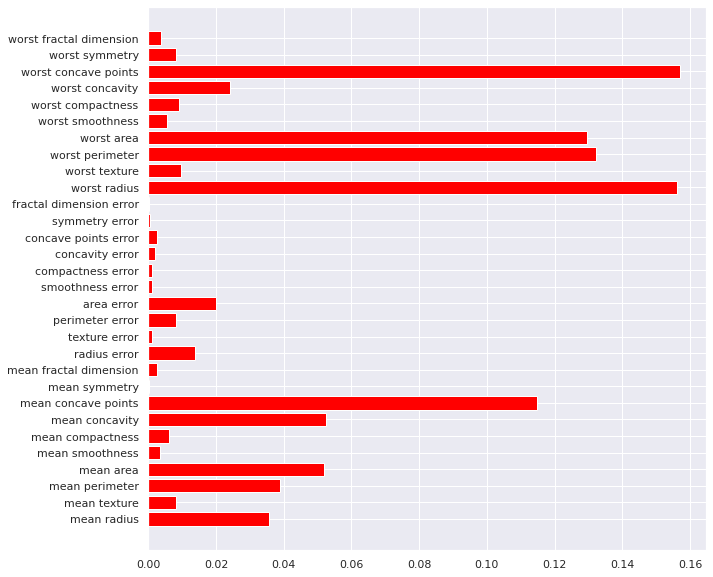

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
plt.barh(bc.feature_names, rfc.feature_importances_, color='red')
plt.show()

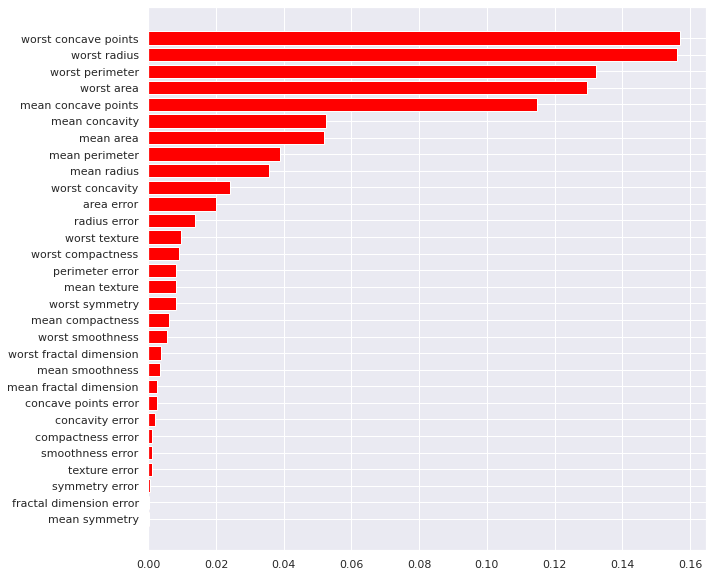

In [ ]:
# 根據特徵影響程度對 feature 做排序
plt.rcParams["figure.figsize"] = (10,10)
sorted_idx = rfc.feature_importances_.argsort()
plt.barh(bc.feature_names[sorted_idx], rfc.feature_importances_[sorted_idx], color='red')
plt.show()

#### 模型儲存

In [ ]:
# 儲存模型
file_name = './ntpu_ml_random_forest.pkl'
pickle.dump(rfc, open(file_name, 'wb'))

# 匯入模型
file_name = './ntpu_ml_random_forest.pkl'
rfc_2 = pickle.load(open(file_name, 'rb'))

In [ ]:
# 用匯入的模型再次進行預測
y_pred_2 = rfc_2.predict(X_test)
predictions_2 = [round(value) for value in y_pred_2]
predictions_2[:3]

# 評估模型表現
accuracy = accuracy_score(y_test, predictions_2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.91%


### 4.4 KNN 

#### 模型訓練

In [14]:
import pickle
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [7]:
# 匯入資料
bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target

In [8]:
# 將資料分成 train/test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [9]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

# 評估模型表現
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.98%


#### 模型調參

In [10]:
param_grid = { 
    'n_neighbors': list(range(1,30))
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit=True, verbose=0)
                                            
grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]})

In [11]:
# 最佳參數
print(grid.best_estimator_)

# 用最佳模型進行模型預測
print(grid.predict(X_test)) 

KNeighborsClassifier(n_neighbors=6)
[0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1
 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1
 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0]


#### 模型儲存

In [12]:
tuned_knn = KNeighborsClassifier(n_neighbors=6)
tuned_knn.fit(X_train, y_train)

predictions = tuned_knn.predict(X_test)

# 評估模型表現
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 94.15%


In [15]:
# 儲存模型
file_name = './ntpu_ml_knn.pkl'
pickle.dump(tuned_knn, open(file_name, 'wb'))

# 匯入模型
file_name = './ntpu_ml_knn.pkl'
tuned_knn_2 = pickle.load(open(file_name, 'rb'))

## 5 - 監督式學習 - 迴歸


### 5.1 SVR

#### 模型訓練

In [ ]:
import pickle
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR


# 匯入資料
housing = fetch_california_housing()
X = housing.data
y = housing.target

In [ ]:
# 將資料分成 train/test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# 設定 SVR 模型參數, 在此使用 預設參數
svr = SVR()

# 模型訓練
svr.fit(X_train, y_train)

# 模型預測
predictions = svr.predict(X_test)

# 評估模型表現
rmse = mean_squared_error(y_test, predictions)
print(f"RMSE: {rmse}")

RMSE: 1.337848635274566


#### 模型調參

In [ ]:
# 用 GridSearchCV tune 出模型最佳參數
param_grid = {
    'C': [0.1, 1, 10, 100], 
    'gamma': [1, 0.1],
    'kernel': ('rbf', 'poly')
}

grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=0)
grid.fit(X_train[:10], y_train[:10])

# 最佳參數
print(grid.best_estimator_)

# 用最佳模型進行模型預測
print(grid.predict(X_test)) 

SVR(C=10, gamma=1)
[1.941101 1.941101 1.941101 ... 1.941101 1.941101 1.941101]


In [ ]:
# 設定 Random Forest 模型最佳參數
svr = SVR(C=10, gamma=1, kernel='linear')

# 模型訓練
svr.fit(X_train[:10], y_train[:10])

# 模型預測
predictions = svr.predict(X_test)

# 評估模型表現
rmse = mean_squared_error(y_test, predictions)
print(f"RMSE: {rmse}")

RMSE: 39.79460374570329


#### 特徵重要性
kernel 不是 'linear' 無法用套件 print out feature importance

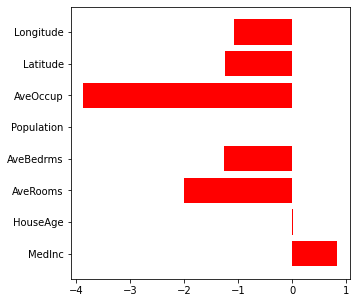

In [ ]:
plt.rcParams["figure.figsize"] = (5,5)
plt.barh(housing.feature_names, svr.coef_.tolist()[0], color='red')
plt.show()

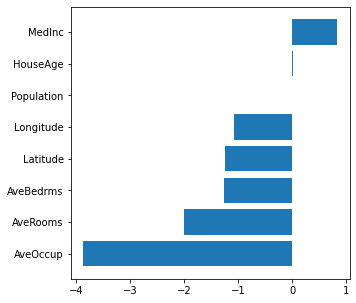

In [ ]:
# 根據 係數 排序
def features_importances(coef, names):
    imp = coef.tolist()[0]
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

plt.rcParams["figure.figsize"] = (5,5)
features_importances(svr.coef_, housing.feature_names)

#### 模型儲存

In [ ]:
# 儲存模型
file_name = './ntpu_ml_svr.pkl'
pickle.dump(svr, open(file_name, 'wb'))

# 匯入模型
file_name = './ntpu_ml_svr.pkl'
svr_2 = pickle.load(open(file_name, 'rb'))

In [ ]:
# 用匯入的模型再次進行預測
y_pred_2 = svr_2.predict(X_test)

# 評估模型表現
rmse = mean_squared_error(y_test, y_pred_2)
print(f"RMSE: {rmse}")

RMSE: 39.79460374570329


### 5.2 Random Forest


#### 模型訓練

In [ ]:
import pickle
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV


In [ ]:
# 匯入資料
housing = fetch_california_housing()
X = housing.data
y = housing.target

In [ ]:
# 將資料分成 train/test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# 設定 SVR 模型參數, 在此使用 預設參數
rf_regression = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# 模型訓練
rf_regression.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
# 模型預測
predictions = rf_regression.predict(X_test)

# 評估模型表現
rmse = mean_squared_error(y_test, predictions)
print(f"RMSE: {rmse}")

RMSE: 0.2593114165666432


#### 模型調參

In [ ]:
# 用 GridSearchCV tune 出模型最佳參數
param_grid = {
    'n_estimators': [200, 400],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid = GridSearchCV(RandomForestRegressor(), param_grid, refit=True, verbose=0, n_jobs=4)
grid.fit(X_train[:10], y_train[:10])

# 最佳參數
print(grid.best_estimator_)

# 用最佳模型進行模型預測
print(grid.predict(X_test))     

RandomForestRegressor(min_samples_leaf=4, n_estimators=400)
[1.95474779 1.88094834 1.95653285 ... 1.87551823 1.88313671 1.89139891]


In [ ]:
# 評估模型表現
rmse = mean_squared_error(y_test, grid.predict(X_test))
print(f"RMSE: {rmse}")

RMSE: 1.2885523605057818


#### 模型重要性

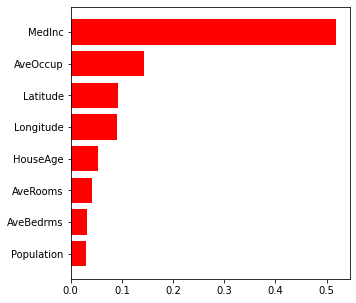

In [ ]:
# 根據特徵影響程度對 feature 做排序
plt.rcParams["figure.figsize"] = (5,5)
sorted_idx = rf_regression.feature_importances_.argsort()
plt.barh(np.array(housing.feature_names)[sorted_idx], rf_regression.feature_importances_[sorted_idx], color='red')
plt.show()

#### 模型儲存

In [ ]:
# 儲存模型
file_name = './ntpu_ml_rf_regression.pkl'
pickle.dump(rf_regression, open(file_name, 'wb'))

# 匯入模型
file_name = './ntpu_ml_rf_regression.pkl'
rf_regression_2 = pickle.load(open(file_name, 'rb'))

In [ ]:
# 評估模型表現
rmse = mean_squared_error(y_test, rf_regression_2.predict(X_test))
print(f"RMSE: {rmse}")

RMSE: 0.2593114165666432


### 5.3 XGBoost

#### 模型訓練

In [ ]:
import pickle
import xgboost as xgb
import matplotlib.pyplot as plt

from numpy import asarray
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV

# 匯入資料
housing = fetch_california_housing()
X = housing.data
y = housing.target

In [ ]:
# 將資料分成 train/test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# 設定 XGBoost 模型參數, 在此使用 預設參數
regressor = xgb.XGBRegressor()

# 模型訓練
regressor.fit(X_train, y_train)

# 模型預測
predictions = regressor.predict(X_test)

# 評估模型表現
rmse = mean_squared_error(y_test, predictions)
print(f"RMSE: {rmse}")

[21:58:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 0.2854462351068275


#### 模型調參

In [ ]:
# 用 GridSearchCV tune 出模型最佳參數
param_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]
}

grid = GridSearchCV(xgb.XGBRegressor(), param_grid, refit=True, verbose=0) # default, cv = 5, which means 5-fold.
grid.fit(X_train[:10], y_train[:10])

# 最佳參數
print(grid.best_estimator_)

# 用最佳模型進行模型預測
print(grid.predict(X_test)) 

[14:48:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:48:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:48:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:48:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:48:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:48:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:48:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:48:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

#### 特徵重要性

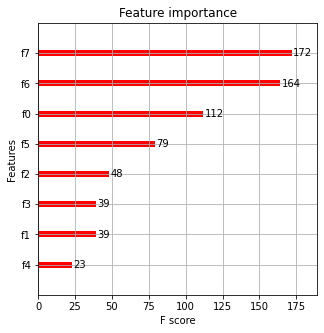

In [ ]:
plt.rcParams["figure.figsize"] = (5,5)
xgb.plot_importance(regressor, color='red') # default is weight, the number of times a feature appears in a tree
plt.show()

#### 模型儲存

In [ ]:
# 儲存模型
file_name = './ntpu_ml_xgboost_regression.pkl'
pickle.dump(regressor, open(file_name, 'wb'))

# 匯入模型
file_name = './ntpu_ml_xgboost_regression.pkl'
regressor_2 = pickle.load(open(file_name, 'rb'))

# 用匯入的模型再次進行預測
predictions_2 = regressor_2.predict(X_test)
predictions_2[:3]

# 評估模型表現
rmse = mean_squared_error(y_test, predictions)
print(f"RMSE: {rmse}")

[14:52:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 0.2854462351068275


### 5.4 Linear Regression

#### 模型訓練

In [17]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pickle
import xgboost as xgb
import matplotlib.pyplot as plt

from numpy import asarray
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV

# 匯入資料
housing = fetch_california_housing()
X = housing.data
y = housing.target

# 將資料分成 train/test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

0.6097142031496132

In [ ]:
# 模型訓練
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

In [18]:
# 截距值與係數值
w_0 = reg.intercept_
w_1 = reg.coef_

print('Interception : ', w_0)
print('Coeficient : ', w_1)

Interception :  -37.28532899875156
Coeficient :  [ 4.41037995e-01  9.68801816e-03 -1.04781309e-01  6.22052706e-01
 -5.61452681e-06 -3.28792384e-03 -4.23182318e-01 -4.37898856e-01]


In [19]:
# 模型預測
predictions = reg.predict(X_test)

# 評估模型表現
rmse = mean_squared_error(y_test, predictions)
print(f"RMSE: {rmse}")

RMSE: 0.5296293151408281


#### 模型儲存

In [28]:
# 儲存模型
file_name = './ntpu_ml_linear_regression.pkl'
pickle.dump(reg, open(file_name, 'wb'))

# 匯入模型
file_name = './ntpu_ml_linear_regression.pkl'
linear_regressor_2 = pickle.load(open(file_name, 'rb'))

# 用匯入的模型再次進行預測
predictions_2 = linear_regressor_2.predict(X_test)
predictions_2[:3]

# 評估模型表現
rmse = mean_squared_error(y_test, predictions)
print(f"RMSE: {rmse}")

RMSE: 0.5296293151408281


## 6 - 實際演練
在此會應用一份 Kaggle 資料集，將本學期所學應用在該資料集。

1. 註冊 Kaggle 
2. 取得 Kaggle Account API Token
3. 下載 Kaggle 資料集


## 7 - 參考資料 & 學習資源

<!-- 1. 李孟(https://leemeng.tw/essence-of-principal-component-analysis.html) -->
<!-- 2. https://www.analyticsvidhya.com/blog/2021/11/pca-on-mnist-dataset/ -->
1. [Colab 呈現中文字] (https://zhuanlan.zhihu.com/p/140102126)
2. [在 Colab 中透過 Kaggle API 下載資料集]https://blog.toright.com/posts/6817/%E5%A6%82%E4%BD%95%E5%9C%A8-colab-%E4%B8%AD%E9%80%8F%E9%81%8E-kaggle-api-%E4%B8%8B%E8%BC%89%E8%B3%87%E6%96%99%E9%9B%86.html